<a href="https://colab.research.google.com/github/mabittar/FinancialData/blob/master/technical_analysis/Pandas_datareader_Get_Stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to get financial data from internet?
### US: In this notebook it's show how to use Pandas DataReaders to get stock data and how to use it
### PT: Nesse notebook será mostrado como obter dados das ações usando Pandas DataReaders e como tratar tais informações.

This example are part of my project, see all project in:
Esse exemplo é parte do meu projeto, veja o projeto completo em:

[Github](https://github.com/mabittar/FinancialData.git)

Pandas DataReader get's data from yahoo.finance.com or google.finance.com

In [0]:
from pandas_datareader import data 

#Import others libraries
import pandas as pd
import numpy as np
from datetime import datetime
from functools import reduce

In [101]:
ibov = data.DataReader('^BVSP', data_source= 'yahoo', start= '2012-01-01')
ibov.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,57993.0,56649.0,56755.0,57829.0,2614600.0,57829.0
2012-01-03,59288.0,57836.0,57836.0,59265.0,3083000.0,59265.0
2012-01-04,59519.0,58558.0,59263.0,59365.0,2252000.0,59365.0
2012-01-05,59354.0,57963.0,59354.0,58546.0,2351200.0,58546.0
2012-01-06,59261.0,58355.0,58565.0,58600.0,1659200.0,58600.0


In [72]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,4]], axis = 1)
ibov.rename(columns = {"Adj Close" : "Ibov"}, inplace = True)
ibov.head()

,Ibov
Date,
2012-01-02,57829.0
2012-01-03,59265.0
2012-01-04,59365.0
2012-01-05,58546.0
2012-01-06,58600.0


In [0]:
tickers = ["^GSPC", "^DJI", "F", "MSFT", "FB", "NFLX", "GOOG", "TSLA", "^BVSP", "PETR4.SA", "VALE3.SA", "UGPA3.SA", "ITSA3.SA", "EZTC3.SA"]

Tickers:

^GSPC = S&P500 

^DJI = DJI

F = Ford

MSFT = Microsoft

FB = Facebook

NFLX = Netflix

GOOG = Alphabet (google)

TSLA = Tesla  

^BVSP = Indice Bovespa

PETR4.SA = Petrobras

VALE3.SA = VALE

UGPA3.SA = Ultrapar

ITSA4.SA = Itausa

EZTC3.SA = EZTEC



In [0]:
df = pd.DataFrame()


for ticker in tickers:
  df[ticker] = data.DataReader(ticker, data_source= 'yahoo', start= '2012-01-01')['Adj Close']

In [75]:
df

,^GSPC,^DJI,F,MSFT,FB,NFLX,GOOG,TSLA,^BVSP,PETR4.SA,VALE3.SA,UGPA3.SA,ITSA3.SA,EZTC3.SA
Date,,,,,,,,,,,,,,
2012-01-03,1277.060059,12397.379883,7.823252,22.020796,NaN,10.320000,331.462585,28.080000,59265.000000,19.135605,30.461170,11.009204,5.238387,7.357967
2012-01-04,1277.300049,12418.419922,7.942743,22.539021,NaN,11.492857,332.892242,27.709999,59365.000000,19.272224,30.667950,11.300061,5.238387,7.415608
2012-01-05,1281.060059,12415.700195,8.146585,22.769344,NaN,11.328571,328.274536,27.120001,58546.000000,19.050215,29.847946,11.219826,5.434825,7.114174
2012-01-06,1277.810059,12359.919922,8.230934,23.123066,NaN,12.327143,323.796326,26.910000,58600.000000,19.067287,29.591255,11.129558,5.238387,7.149641
2012-01-09,1280.699951,12392.690430,8.294192,22.818701,NaN,14.025714,310.067780,27.250000,59083.000000,19.323458,29.555607,11.333493,5.238387,7.242747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-17,2874.560059,24242.490234,5.120000,178.600006,179.240005,422.959991,1283.250000,753.890015,78990.000000,16.129566,44.000000,14.050000,10.660000,29.719999
2020-04-20,2823.159912,23650.439453,4.980000,175.059998,178.240005,437.489990,1266.609985,746.359985,78973.000000,15.949572,42.459999,14.200000,10.590000,33.070000
2020-04-21,2736.560059,23018.880859,4.770000,167.820007,170.800003,433.829987,1216.339966,686.719971,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Let's check for missing values
#For each column, show the fraction of the rows that are NaN.
(df.isnull().sum() / len(df)).sort_values(ascending=False)

FB          0.045455
^BVSP       0.043541
PETR4.SA    0.043062
UGPA3.SA    0.041627
VALE3.SA    0.041627
EZTC3.SA    0.041148
ITSA3.SA    0.041148
TSLA        0.000000
GOOG        0.000000
NFLX        0.000000
MSFT        0.000000
F           0.000000
^DJI        0.000000
^GSPC       0.000000
dtype: float64

If we choose to drop all missing values from FB (Facebook) we'll drop almost 5% of dataframe.

In [0]:
#Let's drop missing rows
stock_prices = df.dropna(subset=["FB"], axis=0, inplace = True) #axis=0 drop row; axis=1 drop collumn

##Let's see two ways to normalize prices

###1. percentage change between the current and a prior element

In [78]:
#Using daily returns (dataframe.pct_chage - use percentage change between the current and a prior element)
tickers_daily_returns = df.pct_change()
tickers_daily_returns

,^GSPC,^DJI,F,MSFT,FB,NFLX,GOOG,TSLA,^BVSP,PETR4.SA,VALE3.SA,UGPA3.SA,ITSA3.SA,EZTC3.SA
Date,,,,,,,,,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,0.016036,0.010922,0.018981,0.016399,-0.109861,0.025443,0.022835,0.043904,0.038101,0.000000,0.031898,0.000000,0.000000,0.000000
2012-05-22,0.000486,-0.000134,-0.000981,0.000336,-0.089039,-0.056175,-0.021674,0.070560,-0.027408,0.033561,-0.012417,0.034352,0.094017,0.029650
2012-05-23,0.001694,-0.000533,0.021590,-0.021841,0.032258,0.062029,0.014414,0.007143,-0.007631,-0.024353,0.008026,-0.026862,-0.042968,-0.023565
2012-05-24,0.001380,0.002689,0.017291,-0.001374,0.032187,-0.022806,-0.009517,-0.023856,-0.010180,-0.027561,-0.011412,-0.013802,-0.044898,0.013405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-17,0.026794,0.029944,0.036437,0.008812,0.016965,-0.036911,0.015655,0.011648,0.015139,0.026081,0.028999,-0.011260,-0.019319,0.009168
2020-04-20,-0.017881,-0.024422,-0.027344,-0.019821,-0.005579,0.034353,-0.012967,-0.009988,-0.000215,-0.011159,-0.035000,0.010676,-0.006567,0.112719
2020-04-21,-0.030675,-0.026704,-0.042169,-0.041357,-0.041741,-0.008366,-0.039689,-0.079908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
#Now it's need to drop NA from first row
tickers_daily_returns.dropna(subset=["^GSPC"], axis=0, inplace = True)

In [80]:
# For each column, show the fraction of the rows that are NaN.
(tickers_daily_returns.isnull().sum() / len(tickers_daily_returns)).sort_values(ascending=False)

EZTC3.SA    0.0
ITSA3.SA    0.0
UGPA3.SA    0.0
VALE3.SA    0.0
PETR4.SA    0.0
^BVSP       0.0
TSLA        0.0
GOOG        0.0
NFLX        0.0
FB          0.0
MSFT        0.0
F           0.0
^DJI        0.0
^GSPC       0.0
dtype: float64

###2. Normalizing prices to start at the same level

In [81]:
tickers_norm = (df/df.iloc[0]*100)
tickers_norm.head()

,^GSPC,^DJI,F,MSFT,FB,NFLX,GOOG,TSLA,^BVSP,PETR4.SA,VALE3.SA,UGPA3.SA,ITSA3.SA,EZTC3.SA
Date,,,,,,,,,,,,,,
2012-05-18,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2012-05-21,101.603590,101.092218,101.898113,101.639926,89.013861,102.544312,102.283479,104.390425,103.810100,NaN,103.189753,100.000000,100.000000,100.000000
2012-05-22,101.653004,101.078710,101.798185,101.674047,81.088152,96.783879,100.066621,111.756168,100.964907,103.356058,101.908399,103.435237,109.401691,102.965019
2012-05-23,101.825174,101.024874,103.995977,99.453374,83.703898,102.787304,101.508997,112.554431,100.194449,100.839012,102.726280,100.656726,104.700901,100.538616
2012-05-24,101.965696,101.296509,105.794215,99.316695,86.398115,100.443111,100.542967,109.869381,99.174509,98.059786,101.553970,99.267496,100.000000,101.886295


In [82]:
# For each column, show the fraction of the rows that are NaN.
(tickers_norm.isnull().sum() / len(tickers_norm)).sort_values(ascending=False)

^BVSP       0.043609
PETR4.SA    0.041604
EZTC3.SA    0.041103
ITSA3.SA    0.041103
UGPA3.SA    0.041103
VALE3.SA    0.041103
TSLA        0.000000
GOOG        0.000000
NFLX        0.000000
FB          0.000000
MSFT        0.000000
F           0.000000
^DJI        0.000000
^GSPC       0.000000
dtype: float64

In [84]:
tickers_norm.dropna(subset=["^BVSP"], axis=0, inplace = True)
tickers_norm.tail()

,^GSPC,^DJI,F,MSFT,FB,NFLX,GOOG,TSLA,^BVSP,PETR4.SA,VALE3.SA,UGPA3.SA,ITSA3.SA,EZTC3.SA
Date,,,,,,,,,,,,,,
2020-04-16,216.144756,190.289893,69.634353,725.728231,461.025378,4394.211170,422.453618,2703.955139,142.740264,96.536138,159.477021,104.441063,231.234023,346.278089
2020-04-17,221.936051,195.987919,72.171635,732.123087,468.846476,4232.018266,429.067266,2735.450034,144.901216,99.053929,164.101712,103.265092,226.766760,349.452777
2020-04-20,217.967602,191.201497,70.198194,717.611766,466.230729,4377.401332,423.503513,2708.127721,144.870031,97.948557,158.358149,104.367563,225.277679,388.842648
2020-04-22,216.126227,189.789792,67.238028,711.298975,476.798328,4216.609681,422.366682,2656.422350,148.014235,102.861336,159.999175,105.837528,225.277679,418.002902
2020-04-23,216.009644,190.108639,68.859075,702.690560,484.253223,4269.439858,426.746828,2560.341141,146.279199,104.153734,162.311513,106.940006,221.661321,389.548155


In [0]:
#prepare data to export in csv format
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
file1 = today+"_datareaders-tickers.csv"
file2 = today+"_datareaders_daily_returns.csv"
file3 = today+"_tickers_normalized.csv"
df.to_csv(file1, index=False)
tickers_daily_returns.to_csv(file2, index=False)
tickers_norm.to_csv(file3, index=False)

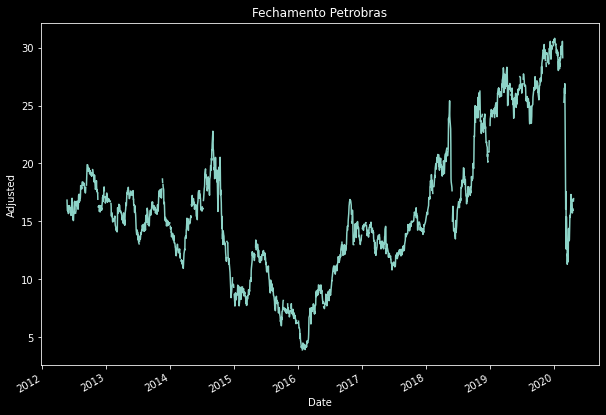

In [85]:
#this part will be covered in the next seccion, but let's see some examples:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
df['PETR4.SA'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Fechamento Petrobras")
plt.style.use('dark_background')
plt.show()

Let's plot the graphic for PETR using candlesitcks

In [105]:
import plotly.graph_objects as go
PETR4 = data.DataReader('PETR4.SA', data_source= 'yahoo', start= '2018-01-01')
dates = PETR4.index
# Let's plot PETR4 with candlesticks
trace1 = {
    'x': dates,
    'open': PETR4.Open,
    'close': PETR4.Close,
    'high': PETR4.High,
    'low': PETR4.Low,
    'type': 'candlestick',
    'name': 'PETR4',
    'showlegend': False
}

# informe all data in an list
plot = [trace1]

# layout config 
layout = go.Layout({
    'title': {
        'text': 'Gráfico de Candlestick - PETR4',
        'font': {
            'size': 20
        }
    }
})

# recall objects and Figure to plot
fig = go.Figure(data=plot, layout=layout)
fig.show()

In [106]:
#just a little of what's to come

EZTC3 = data.DataReader('EZTC3.SA', data_source= 'yahoo', start= '2018-01-01')
dates = EZTC3.index

# 17 days avarge
avg_17 = EZTC3.Close.rolling(window=17, min_periods=1).mean()

import plotly.graph_objects as go
# Let's plot PETR4 with candlesticks
trace1 = {
    'x': dates,
    'open': EZTC3.Open,
    'close': EZTC3.Close,
    'high': EZTC3.High,
    'low': EZTC3.Low,
    'type': 'candlestick',
    'name': 'EZTC3',
    'showlegend': False
}
# avarge for 30 days (line)
trace2 = {
    'x': dates,
    'y': avg_17,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'purple'
    },
    'name': 'Averge 17'
}

# informe all data in an list
plot = [trace1, trace2]

# layout config 
layout = go.Layout({
    'title': {
        'text': 'Gráfico de Candlestick - EZTC3',
        'font': {
            'size': 20
        }
    }
})

# recall objects and Figure to plot
fig = go.Figure(data=plot, layout=layout)
fig.show()